In [1]:
!pip install textblob

In [40]:
#Importing Libraries  and Modules

from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np 
import string
from nltk.corpus import stopwords
import pandas as pd 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
pd.set_option('display.max_colwidth', 100)
from textblob import Word
import random
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.pipeline import Pipeline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#  Extracting the requried data from websites by web scraping

In [ ]:
''' Extracted questoin and answers of Supervised Learning from different websites and converted them into one csv file '''

In [3]:
url=requests.get('https://www.upgrad.com/blog/machine-learning-interview-questions-answers-ii/')
url

<Response [200]>

In [4]:
soups=[]
soup=bs(url.content,'html.parser')
soups.append(soup)
soup.prettify()

'<!DOCTYPE html>\n<html lang="en-US">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <link href="https://gmpg.org/xfn/11" rel="profile"/>\n  <meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">\n   <!-- This site is optimized with the Yoast SEO plugin v16.6.1 - https://yoast.com/wordpress/plugins/seo/ -->\n   <title>\n    25 Machine Learning Interview Questions &amp; Answers - Linear Regression | upGrad blog\n   </title>\n   <meta content="Looking for Machine Learning Interview Questions &amp; Answers to prepare? We have an ultimate guide of knowledge-based Machine Learning Interview Questions and Answers." name="description"/>\n   <link href="https://www.upgrad.com/blog/machine-learning-interview-questions-answers-ii/" rel="canonical"/>\n   <meta content="en_US" property="og:locale"/>\n   <meta content="article" property="og:type"/>\n   <meta content="25 Machine Lear

In [5]:
que=[]
for i in soups:
    reviews=i.find_all(['h3','p'])
    que.append(reviews)

In [6]:
que_extract=[]
for i in que:
    for j in i:
        que_extract.append(j.get_text())
que_extract

['\n\t\t\t\t\t\t\t\t\t\t\tThulasiram is a veteran with 20 years of experience in production planning, supply chain management, quality assurance, Information Technology, and training. Trained in Data Analysis from IIIT Bangalore and UpGrad,…\t\t\t\t\t\t\t\t\t\t',
 'It is a common practice to test data science aspirants on commonly used machine learning algorithms in interviews. These conventional algorithms being linear regression, logistic regression, clustering, decision trees etc. Data scientists are expected to possess an in-depth knowledge of these algorithms. ',
 'We consulted hiring managers and data scientists from various organisations to know about the typical ML questions which they ask in an interview. Based on their extensive feedback a set of question and answers were prepared to help aspiring data scientists in their conversations. Q&As on these algorithms will be provided in a series of four blog posts. ',
 'Each blog post will cover the following topic:-',
 'Table of C

In [7]:
head=['\n\t\t\t\t\t\t\t\t\t\t\tThulasiram is a veteran with 20 years of experience in production planning, supply chain management, quality assurance, Information Technology, and training. Trained in Data Analysis from IIIT Bangalore and UpGrad,…\t\t\t\t\t\t\t\t\t\t',
 'It is a common practice to test data science aspirants on commonly used machine learning algorithms in interviews. These conventional algorithms being linear regression, logistic regression, clustering, decision trees etc. Data scientists are expected to possess an in-depth knowledge of these algorithms. ',
 'We consulted hiring managers and data scientists from various organisations to know about the typical ML questions which they ask in an interview. Based on their extensive feedback a set of question and answers were prepared to help aspiring data scientists in their conversations. Q&As on these algorithms will be provided in a series of four blog posts. ',
 'Each blog post will cover the following topic:-',
 'Table of Contents','\n Machine Learning Engineers: Myths vs. Realities\nThat’s the end of the first section of this series. Stick around for the next part of the series which consist of questions based on Logistic Regression. Feel free to post your comments.\nCo-authored by – Ojas Agarwal\nisSingle = true; catStr = Artificial Intelligence;\n\nLead the AI Driven Technological Revolution\n\n\n\t\t\t\t\t\t\t\t\t\tPG Diploma in Machine Learning and Artificial Intelligence\t\t\t\t\t\t\t\t\t\nLearn More\n\n\n',
 'That’s the end of the first section of this series. Stick around for the next part of the series which consist of questions based on Logistic Regression. Feel free to post your comments.\nCo-authored by – Ojas Agarwal',
 ' Cancel reply',
 'Your email address will not be published.',
 'Comment ',
 'Name ',
 'Email ',
 'Website ',
 ' \n\n',
 '',
 'Our Trending Machine Learning Courses',
 'Accelerate Your Career with upGrad',
 'Our Popular Machine Learning Course',
 'Building Careers of Tomorrow',
 'Register for a Demo Course',
 'Register for a Demo Course',
 'Register for a Demo Course',
 'Talk to our Counselor to find a best course suitable to your Career Growth']
clean=[]
for i in que_extract:
    if i not in head:
        clean.append(i)
    

In [8]:
import re
pattern=r"^\d+\.[\w\d\s]+\?*"
flag=2
str1=""
ques=[]
ans=[]
j=0
for i in clean:
    j=j+1
    w=re.findall(pattern,i)
    #print(w)
    if len(w)>0:
        ques.append(str(i))
        if len(ques)==flag:
            ans.append(str1)
            str1=""
            flag=flag+1
    else:
        str1=str1+str(i)
ans.append(str1)
print(len(ques))
print(len(ans))
for i in range(len(ans)):
    ans[i]=ans[i].replace('\n'," ")
for i in range(len(ans)):
    #ques[i]=ques[i].replace('\n'," ")
    ques[i]=re.sub(r"[0-9 ]+\."," ",ques[i])
    
df=pd.DataFrame({"Questions":ques,"Answer":ans})
pd.set_option("display.max_colwidth", None)
df


25
25


Questions  \
0                                                                                                                                            What is linear regression?   
1                                                                                                                   State the assumptions in a linear regression model.   
2                                                                                         What is feature engineering? How do you apply it in the process of modelling?   
3                                                                                                 What is the use of regularisation? Explain L1 and L2 regularisations.   
4                                                                                                           How to choose the value of the parameter learning rate (α)?   
5                                                                                                          How to choose the value of the regularisation parameter (λ)?   
6                                                                                                                Can we use linear regression for time series analysis?   
7                                                                                      What value is the sum of the residuals of a linear regression close to? Justify.   
8                                                                                                              How does multicollinearity affect the linear regression?   
9                                                  What is the normal form (equation) of linear regression? When should it be preferred to the gradient descent method?   
10    You run your regression on different subsets of your data, and in each subset, the beta value for a certain variable varies wildly. What could be the issue here?   
11         Your linear regression doesn’t run and communicates that there is an infinite number of best estimates for the regression coefficients. What could be wrong?   
12                                                                                                        What do you mean by adjusted R2? How is it different from R2?   
13                                                                                                             How do you interpret the residual vs fitted value curve?   
14                                                                                  What is heteroscedasticity? What are the consequences, and how can you overcome it?   
15                                                                                                                                What is VIF? How do you calculate it?   
16                                                                                               How do you know that linear regression is suitable for any given data?   
17                                                                                                                 How is hypothesis testing used in linear regression?   
18                                                                                                          Explain gradient descent with respect to linear regression.   
19                                                                                                                      How do you interpret a linear regression model?   
20                                                                                                                                           What is robust regression?   
21                                                                                                      Which graphs are suggested to be observed before model fitting?   
22                                                                                                                                What is the generalized linear model?   
23                                                    

In [ ]:
'''Done web scraping of websites of requried topic in the above method and saved all the question and answers in one csv file'''

In [ ]:
# Data Pre processing and EDA 

In [41]:
data=pd.read_csv('final_data.csv',engine='python',encoding = 'unicode_escape')

In [42]:
data

,Unnamed: 0,Questions,Answer
0,0,What is Linear Regression Algorithm?,"In simple terms: It is a method of finding the best straight line fitting to the given dataset, ..."
1,1,How do you interpret a linear regression model?,As we know that the linear regression model is of the form:The significance of the linear regres...
2,2,What are the basic assumptions of the Linear Regression Algorithm?,The basic assumptions of the Linear regression algorithm are as follows: Linearity: The relation...
3,3,Explain the difference between Correlation and Regression.,Correlation: It measures the strength or degree of relationship between two variables. It doesnâ...
4,4,Explain the Gradient Descent algorithm with respect to linear regression.,"Gradient descent is a first-order optimization algorithm. In linear regression, this algorithm i..."
...,...,...,...
706,958,What are dimensionality reduction and its benefits?,Dimensionality reduction refers to the process of converting a data set with vast dimensions int...
707,959,How can you select k for k-means?,We use the elbow method to select k for k-means clustering. The idea of the elbow method is to r...
708,960,What are the feature vectors?,A feature vector is an n-dimensional vector of numerical features that represent an object. In m...
709,961,What is root cause analysis?,Root cause analysis was initially developed to analyze industrial accidents but is now widely us...


### Removing punctuation,Tokenization,Lower case,Stopwords removal , lemmatization  on Questions column

In [43]:
data['question_clean'] = data['Questions'].str.replace('[^\w\s]','')# Removing Punctuations
data['question_clean'] = data['question_clean'].apply(word_tokenize)# Tokenization
data['question_clean'] = data['question_clean'].apply(lambda x: [word.lower() for word in x]) # Converting all Characters to Lowercas

In [44]:
stop_words = set(stopwords.words('english'))
data['question_clean'] = data['question_clean'].apply(lambda x: [word for word in x if word not in stop_words])#Removing stop words
data['question_clean'] = [' '.join(map(str, l)) for l in data['question_clean']] # joining into string to perform lemmatization
data['question_clean'] = data['question_clean'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [45]:
data

,Unnamed: 0,Questions,Answer,question_clean
0,0,What is Linear Regression Algorithm?,"In simple terms: It is a method of finding the best straight line fitting to the given dataset, ...",linear regression algorithm
1,1,How do you interpret a linear regression model?,As we know that the linear regression model is of the form:The significance of the linear regres...,interpret linear regression model
2,2,What are the basic assumptions of the Linear Regression Algorithm?,The basic assumptions of the Linear regression algorithm are as follows: Linearity: The relation...,basic assumption linear regression algorithm
3,3,Explain the difference between Correlation and Regression.,Correlation: It measures the strength or degree of relationship between two variables. It doesnâ...,explain difference correlation regression
4,4,Explain the Gradient Descent algorithm with respect to linear regression.,"Gradient descent is a first-order optimization algorithm. In linear regression, this algorithm i...",explain gradient descent algorithm respect linear regression
...,...,...,...,...
706,958,What are dimensionality reduction and its benefits?,Dimensionality reduction refers to the process of converting a data set with vast dimensions int...,dimensionality reduction benefit
707,959,How can you select k for k-means?,We use the elbow method to select k for k-means clustering. The idea of the elbow method is to r...,select k kmeans
708,960,What are the feature vectors?,A feature vector is an n-dimensional vector of numerical features that represent an object. In m...,feature vector
709,961,What is root cause analysis?,Root cause analysis was initially developed to analyze industrial accidents but is now widely us...,root cause analysis


In [46]:
data['Answer'] = data['Answer'].str.replace('[^\w\s]','')# Removing Punctuations

In [47]:
data

,Unnamed: 0,Questions,Answer,question_clean
0,0,What is Linear Regression Algorithm?,In simple terms It is a method of finding the best straight line fitting to the given dataset ie...,linear regression algorithm
1,1,How do you interpret a linear regression model?,As we know that the linear regression model is of the formThe significance of the linear regress...,interpret linear regression model
2,2,What are the basic assumptions of the Linear Regression Algorithm?,The basic assumptions of the Linear regression algorithm are as follows Linearity The relationsh...,basic assumption linear regression algorithm
3,3,Explain the difference between Correlation and Regression.,Correlation It measures the strength or degree of relationship between two variables It doesnât ...,explain difference correlation regression
4,4,Explain the Gradient Descent algorithm with respect to linear regression.,Gradient descent is a firstorder optimization algorithm In linear regression this algorithm is u...,explain gradient descent algorithm respect linear regression
...,...,...,...,...
706,958,What are dimensionality reduction and its benefits?,Dimensionality reduction refers to the process of converting a data set with vast dimensions int...,dimensionality reduction benefit
707,959,How can you select k for k-means?,We use the elbow method to select k for kmeans clustering The idea of the elbow method is to run...,select k kmeans
708,960,What are the feature vectors?,A feature vector is an ndimensional vector of numerical features that represent an object In mac...,feature vector
709,961,What is root cause analysis?,Root cause analysis was initially developed to analyze industrial accidents but is now widely us...,root cause analysis


In [185]:
# WordCloud

In [186]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [187]:
text = ' '.join(data['question_clean'])

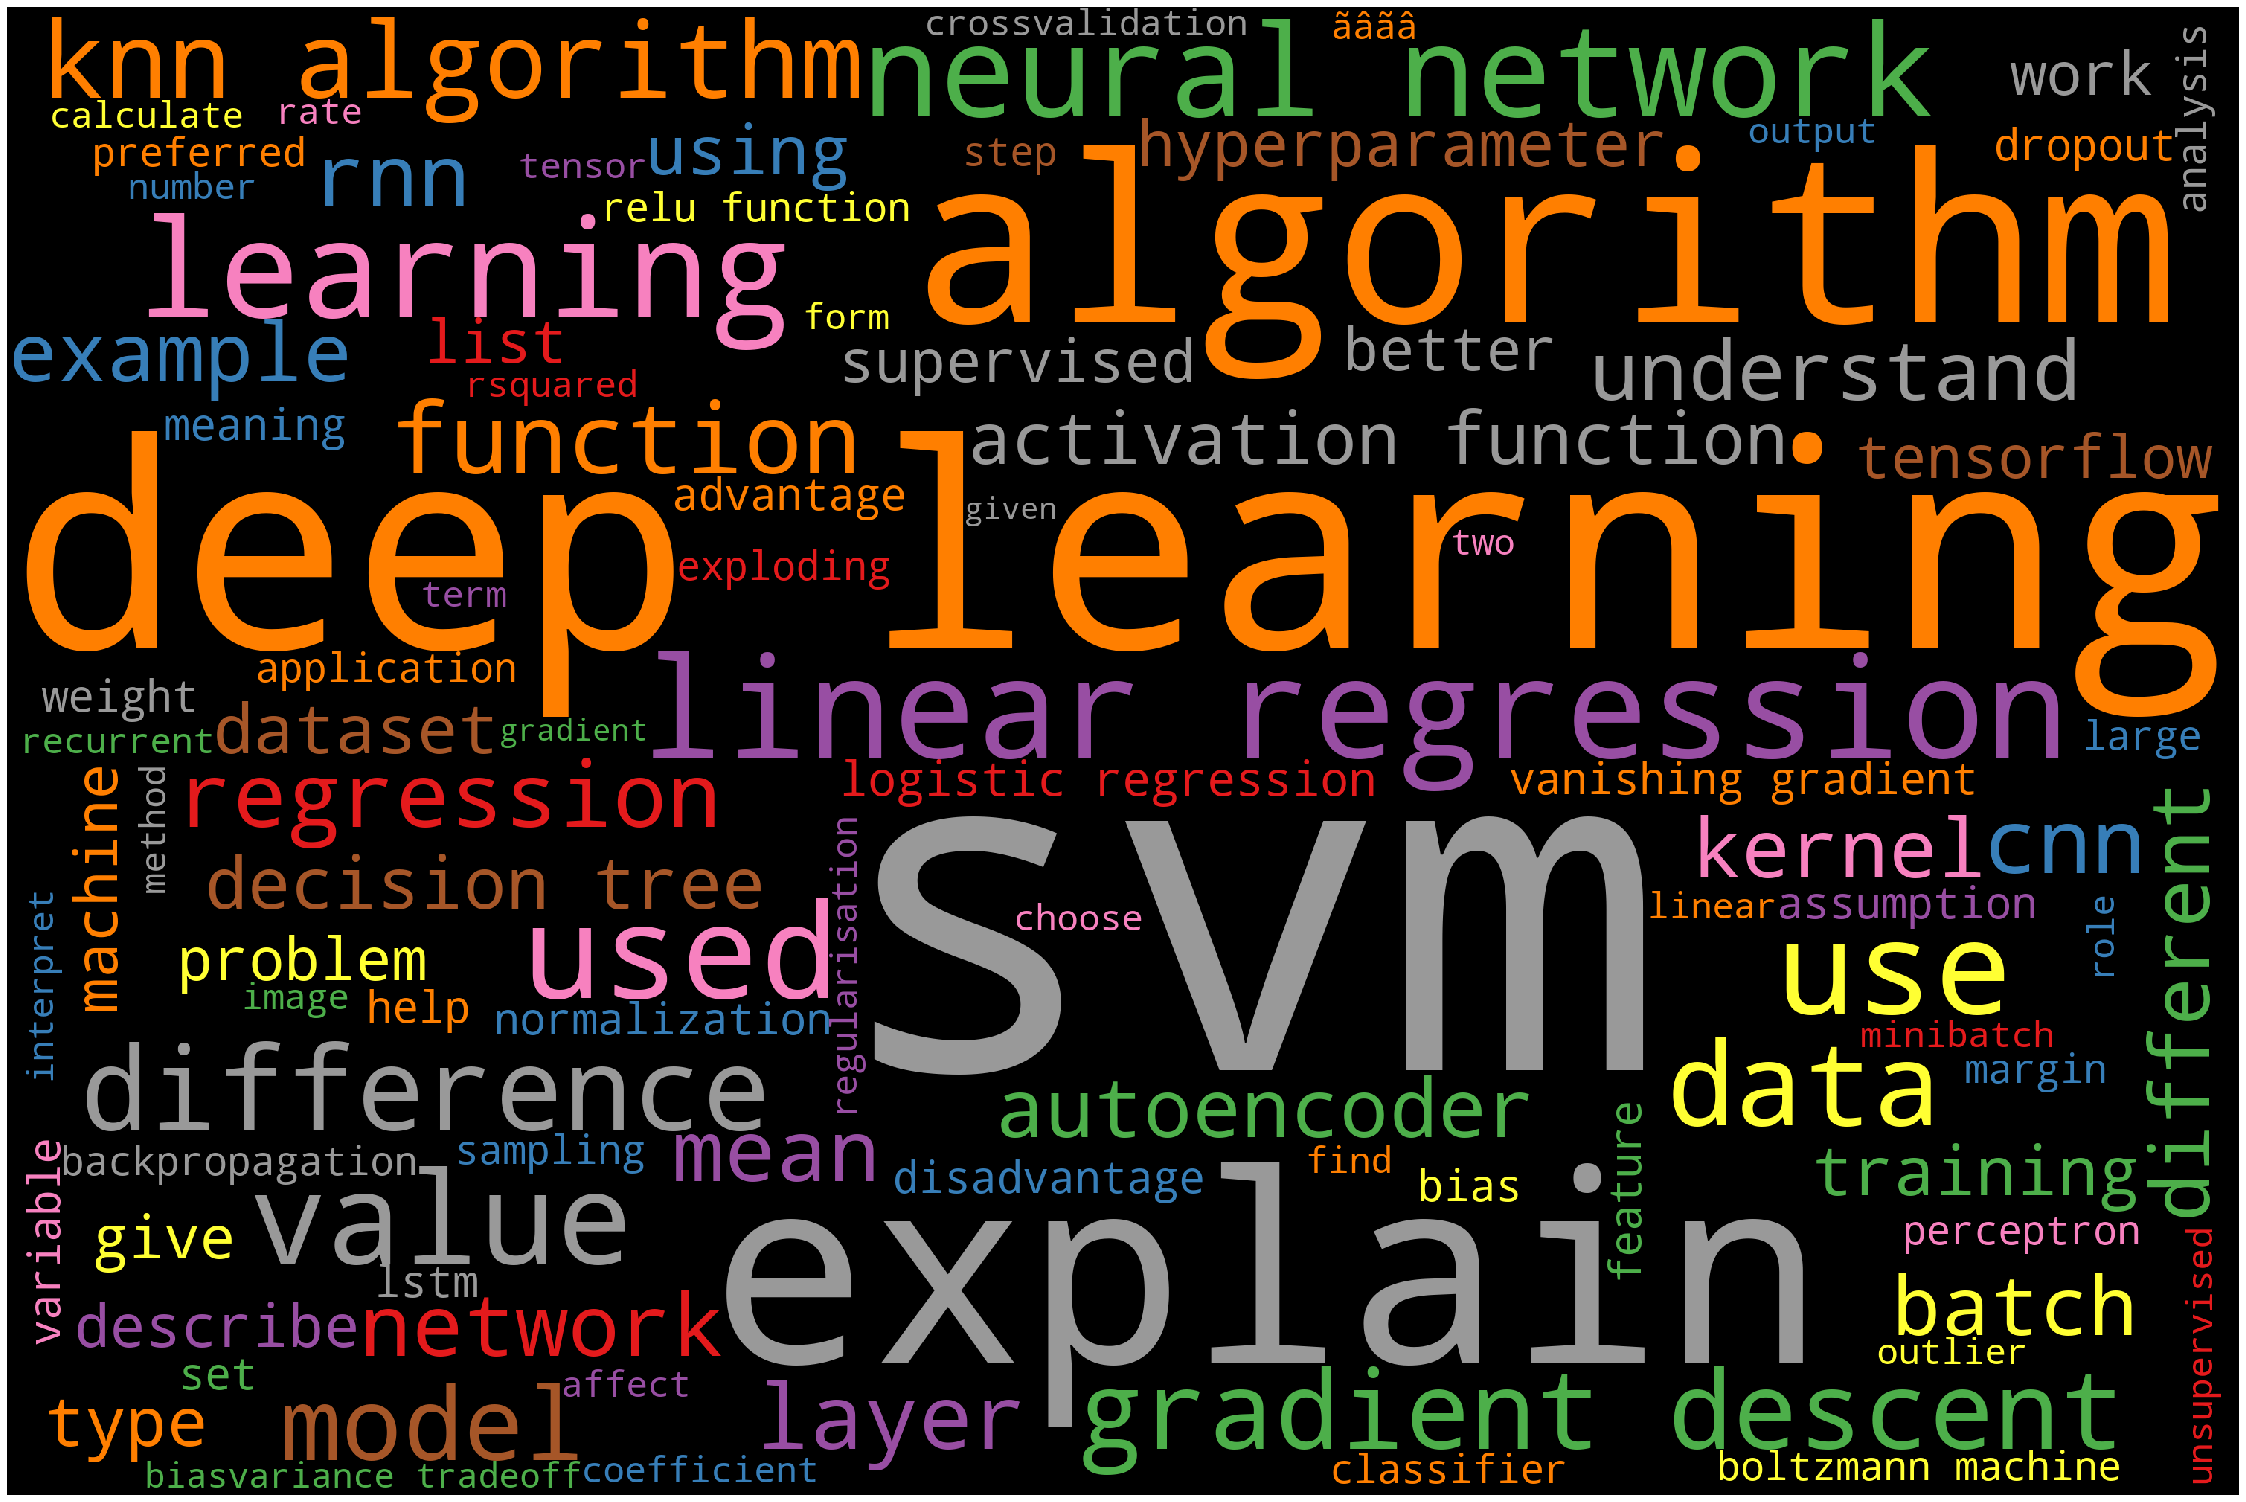

In [188]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set1',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [88]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [89]:
sw_nltk = stopwords.words('english')

In [90]:
sw_nltk.extend(['explain','describe','image','`','detail','list','ÃÂÃ','ÃÃÂÃ','Â','ÂÂ','use','used','ââââ','â','ââ','âââ'])

In [91]:
data['question_clean'] = data['question_clean'].str.split().map(lambda x: [word for word in x if word not in sw_nltk])

In [92]:
data['question_clean']=data['question_clean'].apply(' '.join)

In [194]:
text2 = ' '.join(data['question_clean'])

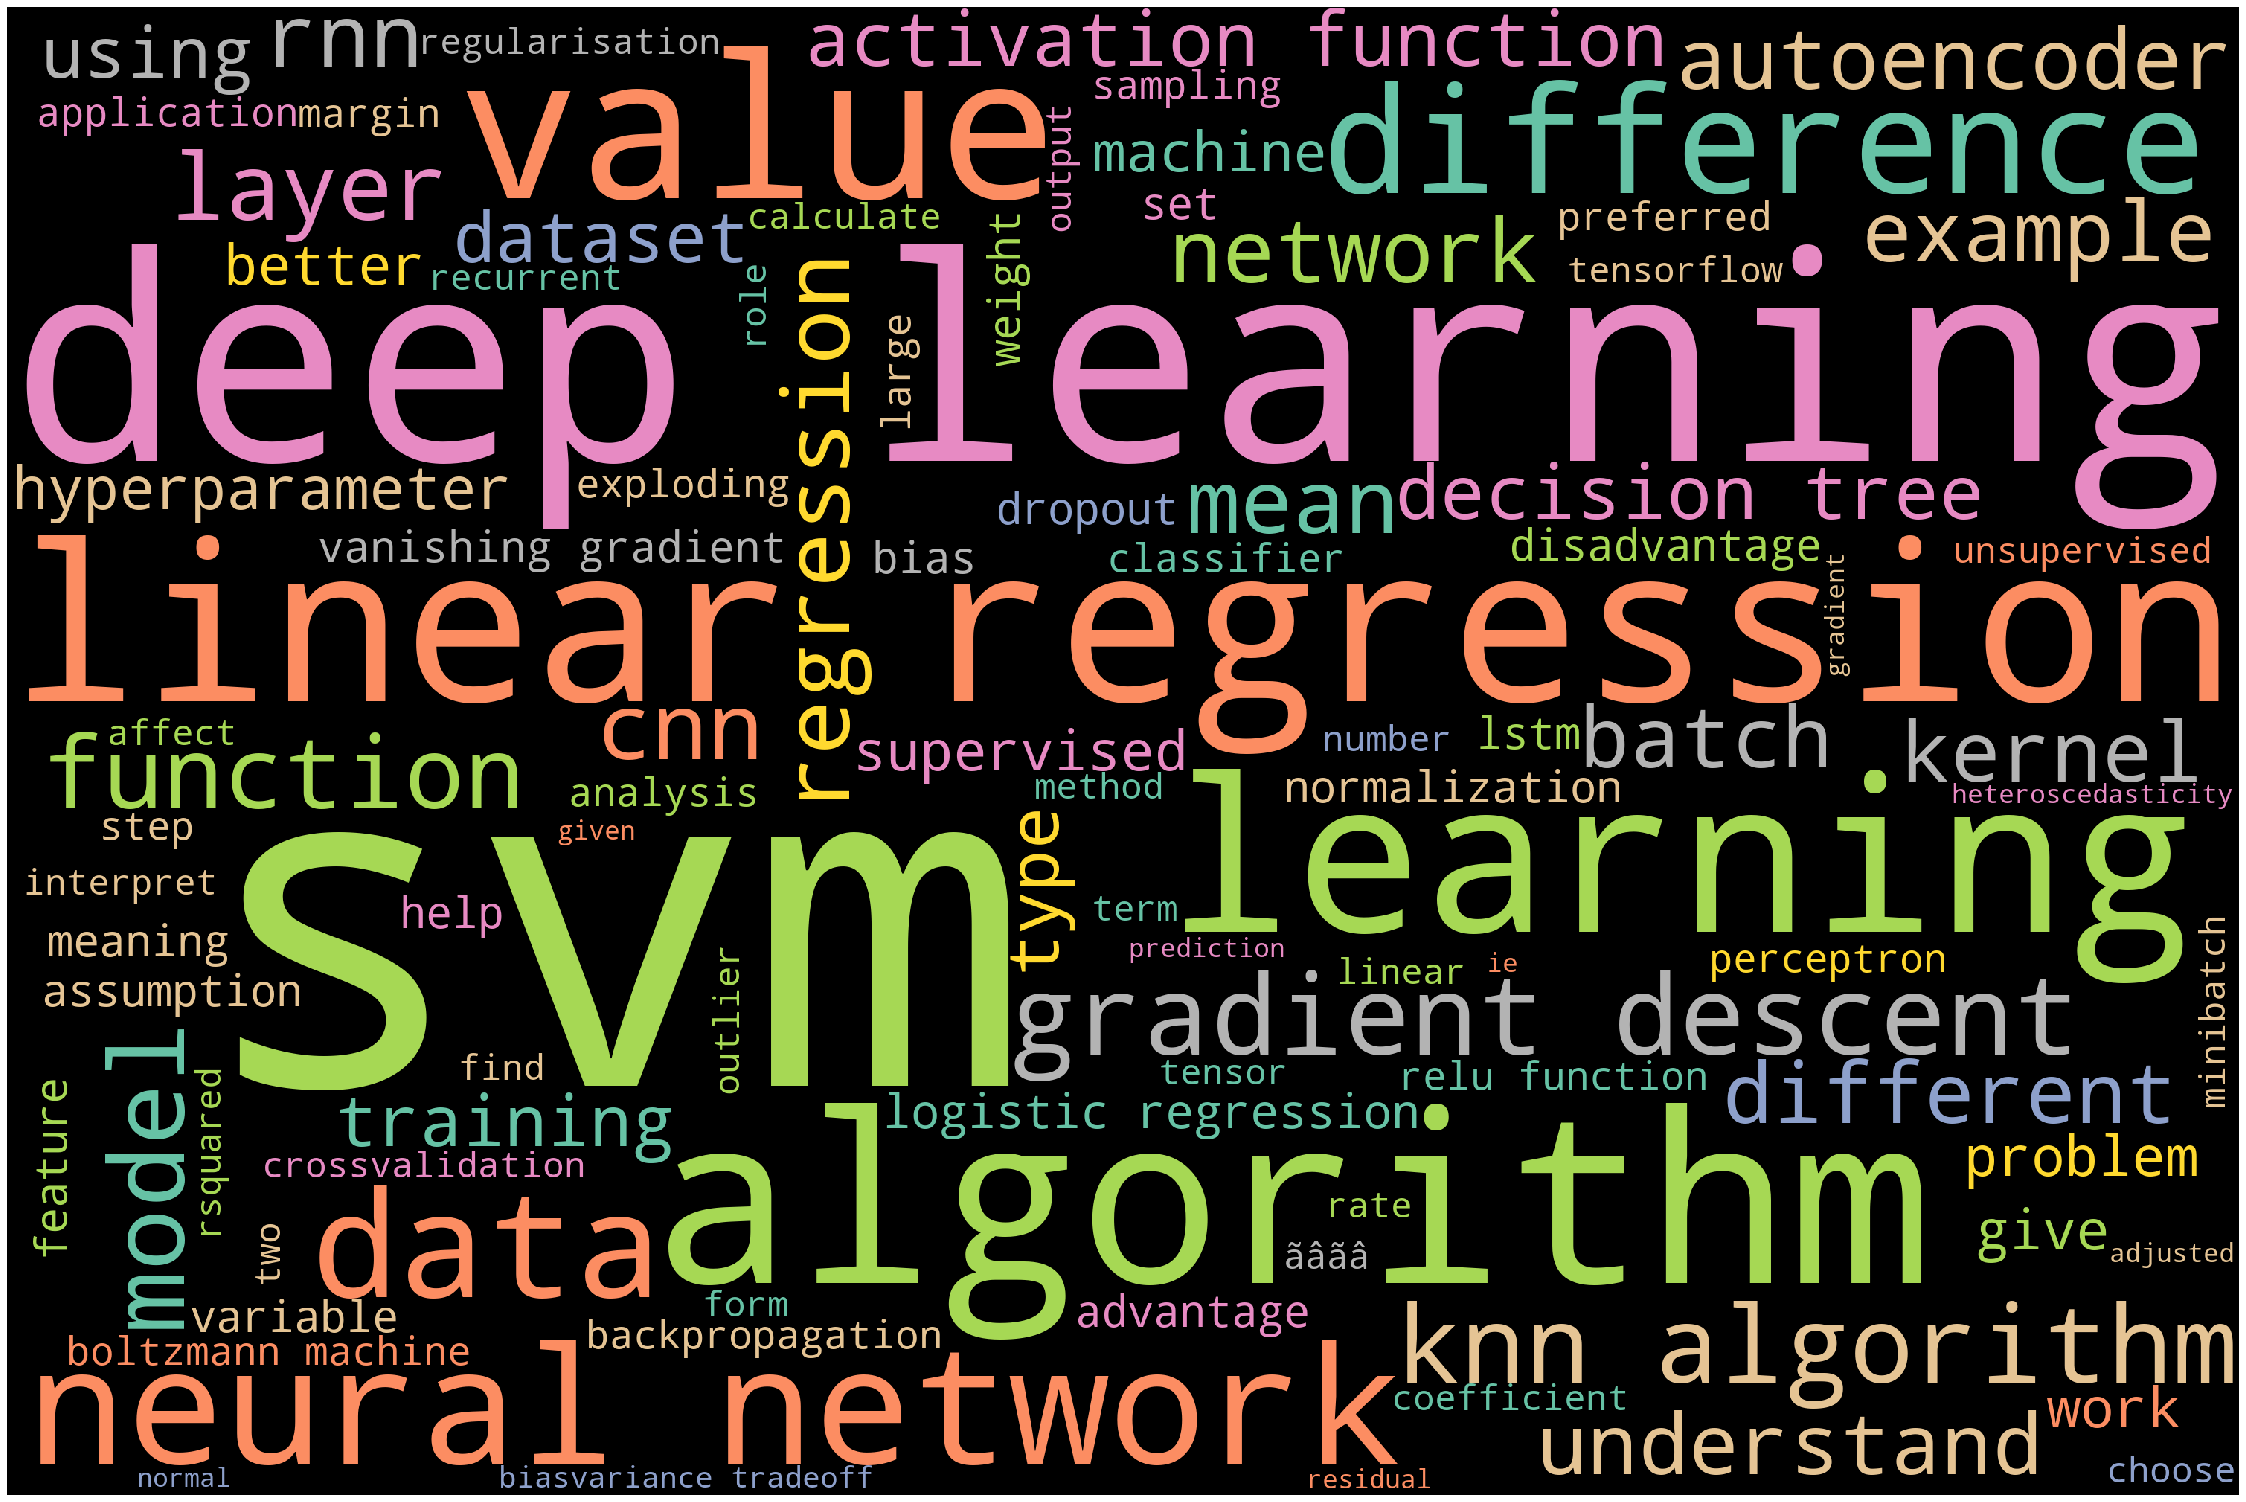

In [195]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text2)
# Plot
plot_cloud(wordcloud)

In [78]:
que=np.array(data['question_clean'])
s=str(que)
que_toc = word_tokenize(s)
print(que_toc)

['[', "'linear", 'regression', 'algorithm', "'", "'interpret", 'linear', 'regression', "model'", "'basic", 'assumption', 'linear', 'regression', "algorithm'", "'difference", 'correlation', "regression'", "'gradient", 'descent', 'algorithm', 'respect', 'linear', "regression'", "'justify", 'case', 'linear', 'regression', 'algorithm', 'suitable', 'given', "dataset'", "'metric", 'evaluate', 'regression', "model'", "'linear", 'regression', 'model', 'interpret', 'qq', "plot'", "'linear", 'regression', 'value', 'sum', 'residual', 'given', 'dataset', 'proper', "justification'", "'rmse", 'mse', 'calculate', "'", "'ols", "'", "'mae", "mape'", "'evaluation", 'metric', 'prefer', 'dataset', 'lot', "outlier'", "'normal", 'form', 'equation', 'linear', "regression'", "'preferred", 'gradient', 'descent', 'method', 'instead', 'normal', 'equation', 'linear', 'regression', "algorithm'", "'rsquared", 'adjusted', 'rsquared', "'", "'flaw", 'rsquared', "'", "'multicollinearity'", "'heteroscedasticity", 'detec

In [80]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [82]:
# Top 20 Bi-gram words
top2_words = get_top_n2_words(data['question_clean'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]


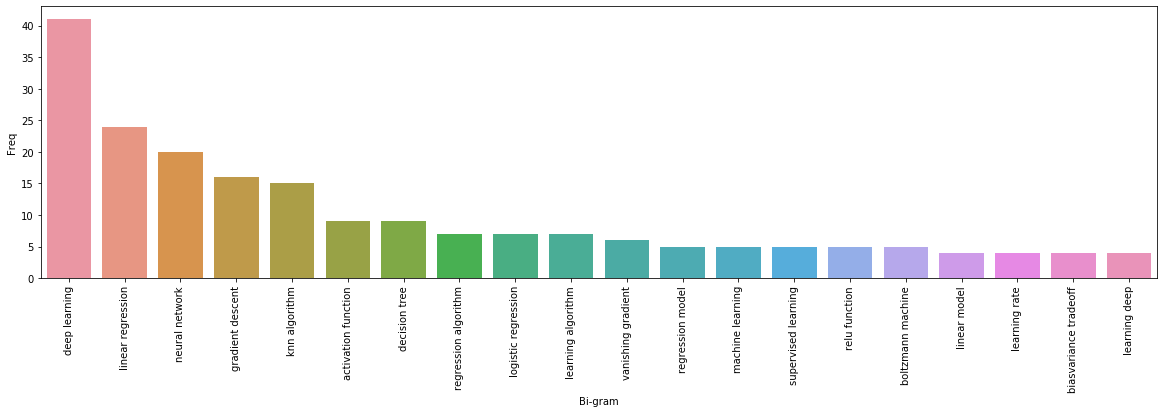

In [83]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

In [84]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [85]:
top3_words = get_top_n3_words(data['question_clean'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

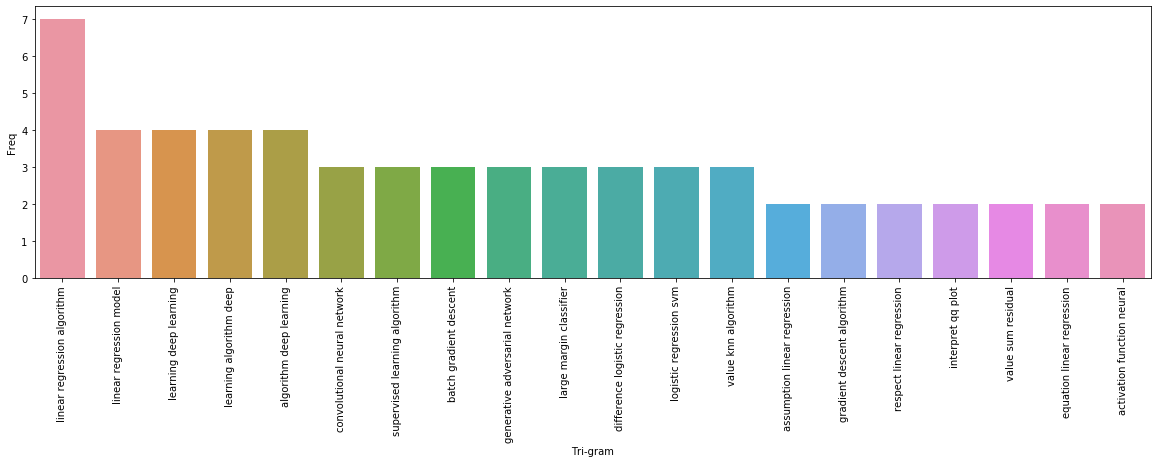

In [86]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

In [ ]:
# removing unwated from Answer column

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      711 non-null    int64 
 1   Questions       711 non-null    object
 2   Answer          711 non-null    object
 3   question_clean  711 non-null    object
dtypes: int64(1), object(3)
memory usage: 22.3+ KB


In [98]:
data=data.dropna(how='any')

## Models 

In [48]:
def cleaner(x):
    return [a for a in (''.join([a for a in x if a not in string.punctuation])).lower().split()]

In [ ]:
# Greeitngs function

In [ ]:
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey","howdy")
GREETING_RESPONSES = ["hi", "hey", "hi there", "hello", "I am glad! You are talking to me"]
def greeting(sentence):
 
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

### Decision Tree Classifier

In [11]:
# Decision Tree Classifier
Pipe = Pipeline(
    [ ('bow',CountVectorizer(analyzer=cleaner)),
     ('tfidf',TfidfTransformer()), 
     ('classifier',DecisionTreeClassifier(criterion='gini',)) 
    ])

In [12]:
Pipe.fit(data['question_clean'],data['Answer'])

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function cleaner at 0x00000205608679D8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b'...
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                       

In [13]:
Pipe.predict(['what is knn algorithm'])[0]

'KNNKnearest neighbours is a supervised learning and nonparametric algorithm that can be used to solve both classification and regression problem statementsIt uses data in which there is a target column present ie labelled data to model a function to produce an output for the unseen data It uses the euclidean distance formula to compute the distance between the data points for classification or predictionThe main objective of this algorithm is that similar data points must be close to each other so it uses the distance to calculate the similar points that are close to each otherImage Source Google Images'

In [23]:
#!pip install termcolor

In [51]:
 from termcolor import colored


In [172]:
flag=True
print("SARTHI : Hello Iam SARTHI . I will answer your queries on Supervised learning. If you want to exit , type Bye")
while(flag==True):
    response= input()
    response=response.lower()
    if(response!='bye'):
        if(response=='thanks'or response=='thank you' or response=='ok thanks'):
            print(colored('SARTHI: You are welcome....','green',attrs=['bold']))
        else:
            if(greeting(response)!=None):
                print(colored('SARTHI : '+greeting(response),'green', attrs=['bold']))
            elif((Pipe.predict([response])[0]=='Can we apply the kernel trick to logistic regression? Why is it not used in practice then?Ans.Looking at the above it almost feels like kernel logistic regression is what you should be using. However, there are certain advantages that SVMs enjoy' or Pipe.predict([response])[0]=='Explanation:')):
                    print(colored("SARTHI : Sorry I can't understand please rephrase the question" ,'red', attrs=['bold']))
            else:
                print(colored('SARTHI: '+Pipe.predict([response])[0],'blue', attrs=['bold']))
    else:
        flag=False
        print (colored('SARTHI : Bye! take care..............','green',attrs=['bold']))

SARTHI : Hello Iam SARTHI . I will answer your queries on Supervised learning. If you want to exit , type Bye
hi
SARTHI : hi
list some advantage of decision tree
SARTHI: 1 Clear Visualization  This algorithm is simple to understand interpret and visualize as the idea is mostly used in our daily lives The output of a Decision Tree can be easily interpreted by humans

2 Simple and easy to understand Decision Tree works in the same manner as simple ifelse statements which are very easy to understand

3 This can be used for both classification and regression problems

4 Decision Trees can handle both continuous and categorical variables

5 No feature scaling required There is no requirement of feature scaling techniques such as standardization and normalization in the case of Decision Tree as it uses a rulebased approach instead of calculation of distances

6 Handles nonlinear parameters efficiently Unlike curvebased algorithms the performance of decision trees canÃÂt be affected by the No

### Naive Bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB as MB

In [26]:

Pipe2 = Pipeline(
    [ ('bow',CountVectorizer(analyzer=cleaner)),
     ('tfidf',TfidfTransformer()),
     ('classifier',MB()) 
    ])

In [27]:
Pipe2.fit(data['question_clean'],data['Answer'])

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function cleaner at 0x000001EB91B6CAF8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [43]:
Pipe2.predict(['what is k in knn'])[0]

'K represents the number of nearest neighbours you want to select to predict the class of a given item which is coming as an unseen dataset for the modelÃÂÃÂ\xa0'

In [149]:
flag=True
print("SARTHI : Hello Iam SARTHI . I will answer your queries on Supervised learning. If you want to exit , type Bye")
while(flag==True):
    response= input()
    response=response.lower()
    if(response!='bye'):
        if(response=='thanks'or response=='thank you' or response=='ok thanks'):
            print(colored('SARTHI: You are welcome....','green',attrs=['bold']))
        else:
            if(greeting(response)!=None):
                print(colored('SARTHI : '+greeting(response),'green', attrs=['bold']))
            elif((Pipe2.predict([response])[0]=='Can we apply the kernel trick to logistic regression? Why is it not used in practice then?Ans.Looking at the above it almost feels like kernel logistic regression is what you should be using. However, there are certain advantages that SVMs enjoy'
                  or Pipe2.predict([response])[0]=='Explanation')):
                    print(colored("SARTHI : Sorry I can't understand please rephrase the question" ,'red', attrs=['bold']))
            else:
                print(colored('SARTHI: '+Pipe2.predict([response])[0],'blue', attrs=['bold']))
    else:
        flag=False
        print (colored('SARTHI : Bye! take care..............','green',attrs=['bold']))

SARTHI : Hello Iam SARTHI . I will answer your queries on Supervised learning. If you want to exit , type Bye
hi
SARTHI : I am glad! You are talking to me
what is k in knn
SARTHI: K represents the number of nearest neighbours you want to select to predict the class of a given item which is coming as an unseen dataset for the modelÃÂÃÂ 
list disadvantages of decision tree
SARTHI: A decision tree is a tree in which every node specifies a test of some attribute of the data and each branch descending from that node corresponds to one of the possible values for this attribute
list disadvantage of decision tree
SARTHI: 1 Overfitting This is the major problem associated with the Decision Trees It generally leads to overfitting of the data which ultimately leads to wrong predictions for testing data points it keeps generating new nodes in order to fit the data including even noisy data and ultimately the Tree becomes too complex to interpret In this way it loses its generalization capabilities

### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
Pipe3 = Pipeline(
    [ ('bow',CountVectorizer(analyzer=cleaner)),
     ('tfidf',TfidfTransformer()),
     ('classifier',RandomForestClassifier()) 
    ])

In [31]:
Pipe3.fit(data['question_clean'],data['Answer'])

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function cleaner at 0x000001EB91B6CAF8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b'...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.

In [125]:
Pipe3.predict(['what is auto-encoder'])[0]

'Autoencoders are simple learning networks that aim to transform inputs into outputs with the minimumÃÂÃÂ\xa0 possible error This means that we want the output to be as close to input as possible We add a couple ofÃÂÃÂ\xa0 layers between the input and the output and the sizes of these layers are smaller than the input layer TheÃÂÃÂ\xa0 autoencoder receives unlabelled input which is then encoded to reconstruct the input '

### KNN 

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
Pipe4 = Pipeline(
    [ ('bow',CountVectorizer(analyzer=cleaner)),
     ('tfidf',TfidfTransformer()),
     ('classifier',KNeighborsClassifier()) 
    ])

In [59]:
Pipe4.fit(data['question_clean'],data['Answer'])

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function cleaner at 0x00000205606473A8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metri

In [72]:
Pipe4.predict(['what is cnn'])[0]

'There are four layered concepts that we should understand in CNN Convolutional Neural Network Convolution This layer comprises of a set of independent filters All these filters are initialized randomly These filters then become our parameters which will be learned by the network subsequently ReLU The ReLu layer is used with the convolutional layer Pooling It reduces the spatial size of the representation to lower the number of parameters and computation in the network This layer operates on each feature map independently Full Collectedness Neurons in a completely connected layer have complete connections to all activations in the previous layer as seen in regular Neural Networks Their activations can be easily computed with a matrix multiplication followed by a bias offset '

### SVM

In [52]:
from sklearn import svm
from sklearn.svm import SVC

In [53]:
Pipe5 = Pipeline(
    [ ('bow',CountVectorizer(analyzer=cleaner)),
     ('tfidf',TfidfTransformer()),
     ('classifier',SVC(kernel='poly',degree=4)) 
    ])

In [54]:
Pipe5.fit(data['question_clean'],data['Answer'])

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function cleaner at 0x00000205606473A8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, 

In [71]:
Pipe5.predict(['what is cnn '])[0:]

array(['CNNs are convolutional neural networks that are used to perform analysis on images and visuals These classes of neural networks can input a multichannel image and work on it easily These Deep Learning questions must be answered in a concise way So make sure to understand them and revisit them if necessary CNNs are convolutional neural networks that are used to perform analysis on images and visuals These classes of neural networks can input a multichannel image and work on it easilyThese Deep Learning questions must be answered in a concise way So make sure to understand them and revisit them if necessary'],
      dtype=object)

In [56]:
flag=True
print("SARTHI : Hello Iam SARTHI . I will answer your queries on Supervised learning. If you want to exit , type Bye")
while(flag==True):
    response= input()
    response=response.lower()
    if(response!='bye'):
        if(response=='thanks'or response=='thank you' or response=='ok thanks'):
            print(colored('\n SARTHI: You are welcome....','green',attrs=['bold']))
        else:
            if(greeting(response)!=None):
                print(colored('\n SARTHI : '+greeting(response),'green', attrs=['bold']))
            elif((Pipe5.predict([response])[0]=='Explanation:'
                  or Pipe5.predict([response])[0]=='Explanation')):
                    print(colored("\n SARTHI : Sorry I can't understand please rephrase the question" ,'red', attrs=['bold']))
            else:
                print(colored('\n SARTHI: '+Pipe5.predict([response])[0],'blue', attrs=['bold']))
    else:
        flag=False
        print (colored('\n SARTHI : Bye! take care..............','green',attrs=['bold']))

SARTHI : Hello Iam SARTHI . I will answer your queries on Supervised learning. If you want to exit , type Bye
hi

 SARTHI : hey
what is neural network

 SARTHI: Neural Networks replicate the way humans learn inspired by how the neurons in our brains fire only much simplerThe most common Neural Networks consist of three network layersEach sheet contains neurons called ânodesâ performing various operations Neural Networks are used in deep learning algorithms like CNN RNN GAN etcPost Graduate Program in AI and Machine LearningIn Partnership with Purdue UniversityExplore Course
explain knn algorithm

 SARTHI: KNNKnearest neighbours is a supervised learning and nonparametric algorithm that can be used to solve both classification and regression problem statementsIt uses data in which there is a target column present ie labelled data to model a function to produce an output for the unseen data It uses the euclidean distance formula to compute the distance between the data points for classifi

what is the role of activation function in neural network

 SARTHI: At the most basic level an activation function decides whether a neuron should be fired or not It accepts the weighted sum of the inputs and bias as input to any activation function Step function Sigmoid ReLU Tanh and Softmax are examples of activation functions
what are Hyperparameters

 SARTHI: With neural networks youâre usually working with hyperparameters once the data is formatted correctly AÂ  hyperparameter is a parameter whose value is set before the learning process begins It determines how aÂ  network is trained and the structure of the network such as the number of hidden units the learning rateÂ  epochs etc
what are Hyperparameter

 SARTHI : Sorry I can't understand please rephrase the question
What Are Hyperparameters?

 SARTHI: With neural networks youâre usually working with hyperparameters once the data is formatted correctly AÂ  hyperparameter is a parameter whose value is set before the learning proc